## this is example for evaluation in Ch 3.6 for each method

# we set window size = 20

In [18]:
import src.utility.utility_light_curve as ut_lc
import matplotlib.pyplot as plt
from scipy.stats import zscore
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation, \
    OneD_SymbolicAggregateApproximation
from src.Mean_EBinning.Mean_EBinning import Mean_EBinning
import numpy as np
import stumpy

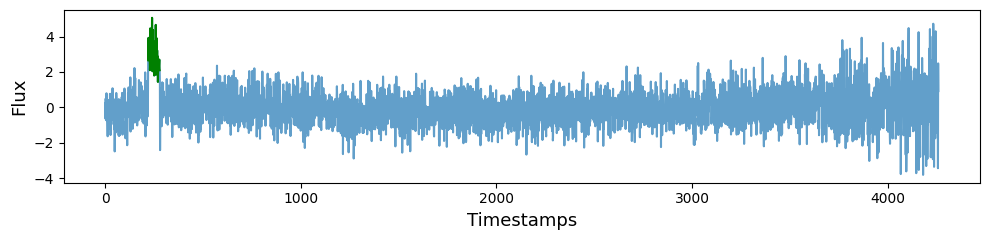

In [19]:
# load example LC
data = ut_lc.get_data_from_file('41270235691548800_3', 3, 60, 'sq')
ts = zscore(data['instances'])
plt.figure(figsize=(10, 2.5))
start = data['ansList'][0]
plt.plot(ts, alpha=0.7)
plt.plot(data['ansList'],ts[start:start+60], color='green')
plt.xlabel('Timestamps', fontsize=13)
plt.ylabel('Flux', fontsize=13)
plt.tight_layout()

### PAA or data binning

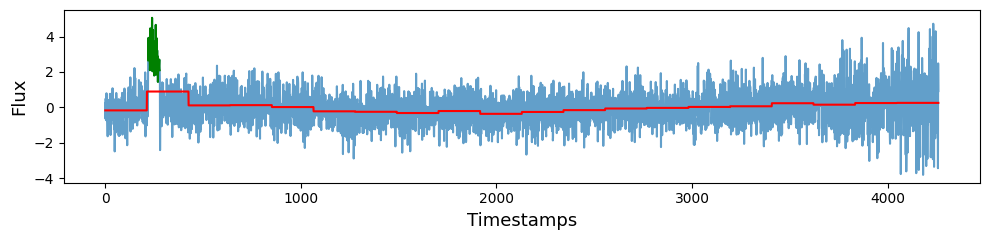

In [20]:
## PAA / Data binning
num_segment = 20

## use TimeSeriesScalerMeanVariance for tslearn library 
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
tslearn_ts = scaler.fit_transform([ts])

paa = PiecewiseAggregateApproximation(n_segments=num_segment)
paa_dataset_inv = paa.inverse_transform(paa.fit_transform(tslearn_ts))

plt.figure(figsize=(10, 2.5))
plt.plot(ts, alpha=0.7)
plt.plot(data['ansList'],ts[start:start+60], color='green')
plt.plot(paa_dataset_inv[0].ravel(), "r")
plt.xlabel('Timestamps', fontsize=13)
plt.ylabel('Flux', fontsize=13)
plt.tight_layout()

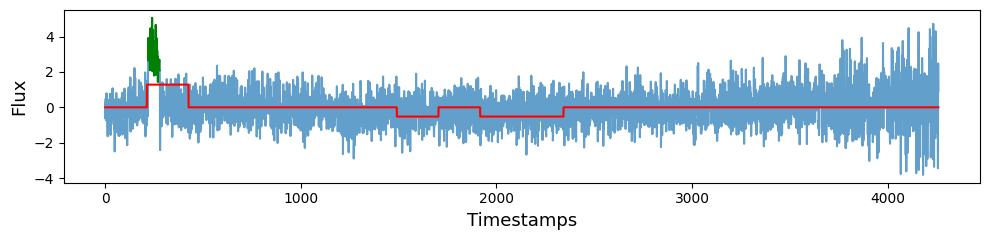

In [21]:
num_segment = 20
n_sax_symbols = 5

## use TimeSeriesScalerMeanVariance for tslearn library 
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
tslearn_ts = scaler.fit_transform([ts])

sax = SymbolicAggregateApproximation(n_segments=num_segment,
                                     alphabet_size_avg=n_sax_symbols)
sax_dataset_inv = sax.inverse_transform(sax.fit_transform(tslearn_ts))
plt.figure(figsize=(10, 2.5))
plt.plot(ts, alpha=0.7)
plt.plot(data['ansList'],ts[start:start+60], color='green')
plt.plot(sax_dataset_inv[0].ravel(), "r")
plt.xlabel('Timestamps', fontsize=13)
plt.ylabel('Flux', fontsize=13)
plt.tight_layout()

## 1D-SAX

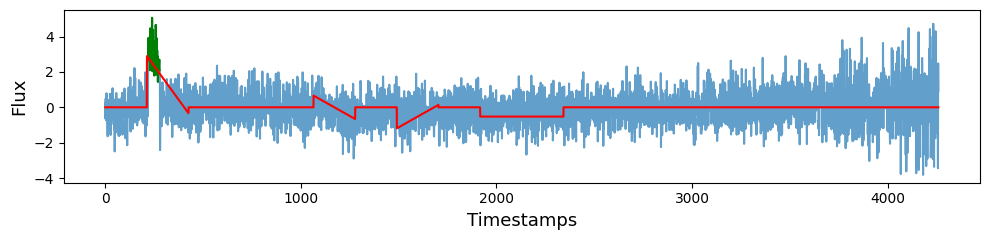

In [22]:
num_segment = 20
n_sax_symbols_avg = 5
n_sax_symbols_slope = 5

## use TimeSeriesScalerMeanVariance for tslearn library 
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
tslearn_ts = scaler.fit_transform([ts])

one_d_sax = OneD_SymbolicAggregateApproximation(
    n_segments=num_segment,
    alphabet_size_avg=n_sax_symbols_avg,
    alphabet_size_slope=n_sax_symbols_slope)
transformed_data = one_d_sax.fit_transform(tslearn_ts)
one_d_sax_dataset_inv = one_d_sax.inverse_transform(transformed_data)
plt.figure(figsize=(10, 2.5))
plt.plot(ts, alpha=0.7)
plt.plot(data['ansList'],ts[start:start+60], color='green')
plt.plot(one_d_sax_dataset_inv[0].ravel(), "r")
plt.xlabel('Timestamps', fontsize=13)
plt.ylabel('Flux', fontsize=13)
plt.tight_layout()

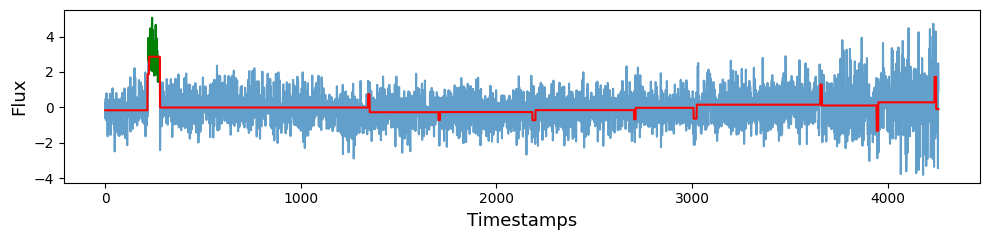

In [23]:
window_size = 21  #When the window size is set to 20, the setting must be adjusted to +1.
ini_bin = 8
EBinning = Mean_EBinning(max_window_size=window_size, ini_binsize=ini_bin, alpha=0.95)
for instance in ts:
    EBinning.add_element(instance)
    
EBinning.insert_latest_buffer()
skectching_result = EBinning.get_skectching_result()
plt.figure(figsize=(10, 2.5))
plt.plot(ts, alpha=0.7)
plt.plot(data['ansList'],ts[start:start+60], color='green')
plt.plot(skectching_result, "r")
plt.xlabel('Timestamps', fontsize=13)
plt.ylabel('Flux', fontsize=13)
plt.tight_layout()

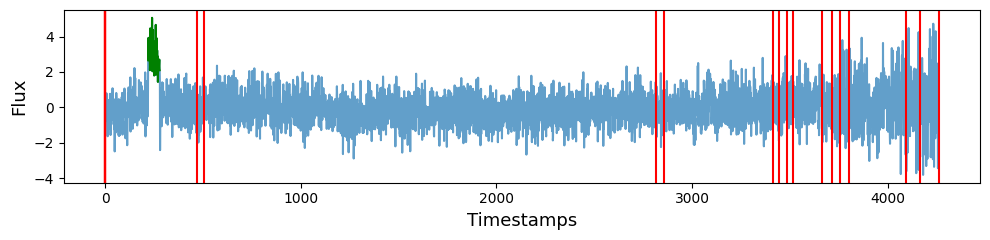

In [27]:
sub_sequence_length = 60
window_size = 20

mp = stumpy.stump(ts, m=sub_sequence_length, normalize=True)   
L = int(sub_sequence_length / 2)
cac, regime_locations = stumpy.fluss(mp[:, 1], L=L, n_regimes=window_size, excl_factor=1)
segment_indices = [0]
regime_locations.sort()
for regime_location in regime_locations:
    segment_indices.append(int(regime_location))
segment_indices.append(len(ts))  
plt.figure(figsize=(10, 2.5))
plt.plot(ts, alpha=0.7)
plt.plot(data['ansList'],ts[start:start+60], color='green')
for index in segment_indices:
    plt.axvline(index,  color="r")
plt.xlabel('Timestamps', fontsize=13)
plt.ylabel('Flux', fontsize=13)
plt.tight_layout()